- iris Dataset

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import seaborn as sns

In [40]:
df = sns.load_dataset('iris')

In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
x = df.drop("species", axis=1)
y = df['species']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

In [44]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train, y_train)

DecisionTreeClassifier()

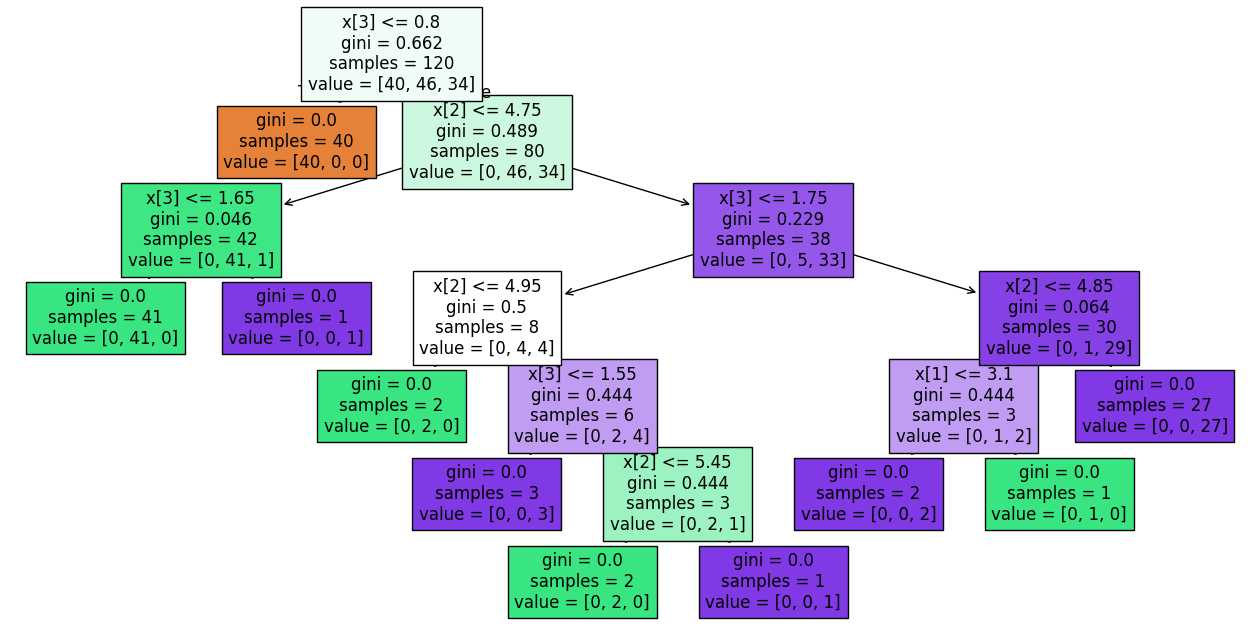

In [45]:
# Visualize the Dicision Tree

plt.figure(figsize=(16, 8))
tree.plot_tree(d_tree, filled=True)
plt.show()

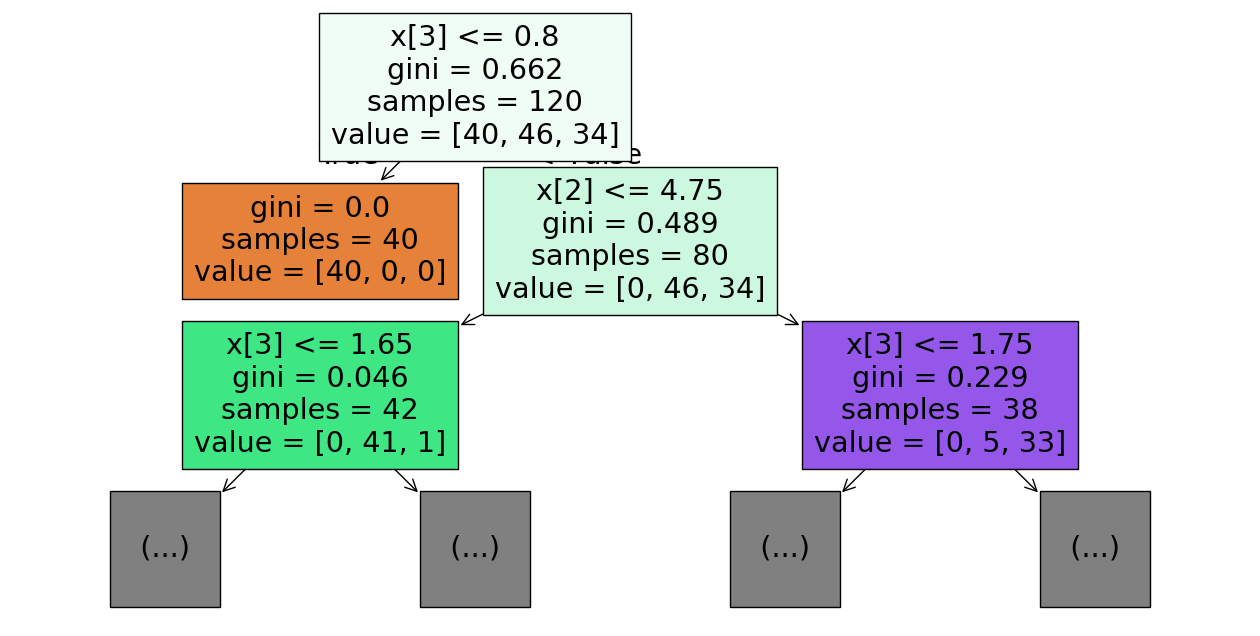

In [46]:
# decision tree with hyper parameter (max_depth)

plt.figure(figsize=(16, 8))
tree.plot_tree(d_tree, filled=True, max_depth=2)
plt.show()

In [47]:
y_pred = d_tree.predict(x_test)
y_pred

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'virginica', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica'], dtype=object)

In [48]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
F1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1_score : {F1_score:.2f}")

Accuracy : 1.00
Precision : 1.00
Recall : 1.00
F1_score : 1.00


# K-Fold Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
x = df.drop("species", axis=1)
y = df['species']

In [51]:
clf = DecisionTreeClassifier(random_state=24)

In [52]:
k = 5
cv_score = cross_val_score(clf, x, y, cv=k)

In [53]:
print(f"Cross-Validation Scores (K={k}): {cv_score}")
print(f"Mean Accuracy: {cv_score.mean():.2f}")
print(f"Standard Deviation: {cv_score.std():.2f}")

Cross-Validation Scores (K=5): [0.96666667 0.96666667 0.9        1.         1.        ]
Mean Accuracy: 0.97
Standard Deviation: 0.04


# Grid Search : HyperParameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
clf2 = DecisionTreeClassifier(random_state=24)

In [56]:
param_grid_ = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,4]
}

In [57]:
grid_search = GridSearchCV(estimator=clf2, param_grid=param_grid_, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=24), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [58]:
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [59]:
best_clf = DecisionTreeClassifier(random_state=24, **best_params)
best_clf.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_split=10, random_state=24)

In [61]:
y_pred = best_clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

In [62]:
print(f"Best Hyperparameters: {best_params}")
print(f"Model Accuracy on Test Data: {accuracy:.2f}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Model Accuracy on Test Data: 1.00
